In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
file_path = 'C:/Users/tsidd/Downloads/data_cleaning/clean_dataset/population_housing_merged_clean.csv'

In [4]:
data = pd.read_csv(file_path)
data.head()

,city,province,abbrev,area_type,pop,pop_density_sq_km,total_dwellings,land_area_sq_km,median_income,lat,lon,address,price,beds,baths
0,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,33 queens road,275000,4,1
1,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,70 julieann place,767500,4,4
2,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,5 ruth avenue,159900,3,1
3,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,11 parliament street,350000,4,3
4,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,84 gil eannes drive,424900,4,3


In [5]:
#Let's start by calculating summary statistics for housing prices by province and territory and explore
#potential contributing factors

# Group data by province and calculate the average housing price and other statistics of interest
province_summary = data.groupby('province').agg(
    avg_price=('price', 'mean'),
    avg_pop_density=('pop_density_sq_km', 'mean'),
    avg_median_income=('median_income', 'mean'),
    total_population=('pop', 'sum')
).reset_index()

# Apply formatting to the numeric columns
province_summary['avg_price'] = province_summary['avg_price'].map('{:,.2f}'.format)
province_summary['avg_pop_density'] = province_summary['avg_pop_density'].map('{:,.2f}'.format)
province_summary['avg_median_income'] = province_summary['avg_median_income'].map('{:,.2f}'.format)
province_summary['total_population'] = province_summary['total_population'].map('{:,.0f}'.format)  # No decimals for total population

province_summary


,province,avg_price,avg_pop_density,avg_median_income,total_population
0,Alberta,"533,165.78","1,836.33","94,756.75","3,307,561,393"
1,British Columbia,"1,394,327.86","1,717.44","84,218.23","4,131,631,297"
2,Manitoba,"480,567.84","2,124.70","83,000.00","360,294,625"
3,New Brunswick,"427,289.77","1,046.53","74,399.80","55,224,089"
4,Newfoundland and Labrador,"438,912.85","1,042.50","85,000.00","120,060,555"
5,Nova Scotia,"794,771.09","1,463.10","86,753.00","31,725,694"
6,Ontario,"928,689.87","1,677.89","92,538.00","11,577,342,385"
7,Quebec,"602,906.80","1,856.30","71,741.68","792,714,151"
8,Saskatchewan,"403,197.64","2,050.89","89,517.55","458,946,867"


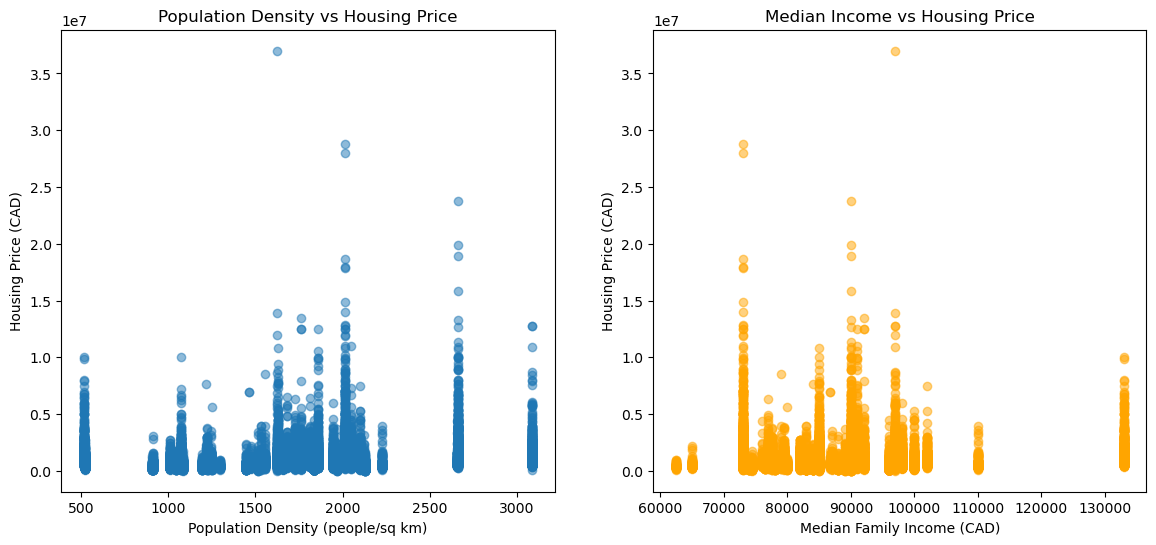

(                      price  pop_density_sq_km  median_income
 price              1.000000           0.112021       0.054073
 pop_density_sq_km  0.112021           1.000000      -0.068771
 median_income      0.054073          -0.068771       1.000000,
 None)

In [6]:
# Check correlation between population density, median income, and housing prices
# Calculate correlations
correlation_matrix = data[['price', 'pop_density_sq_km', 'median_income']].corr()

# Plot scatterplots to visually assess the relationship between population density, income, and housing price
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot: Population Density vs Price
ax[0].scatter(data['pop_density_sq_km'], data['price'], alpha=0.5)
ax[0].set_xlabel('Population Density (people/sq km)')
ax[0].set_ylabel('Housing Price (CAD)')
ax[0].set_title('Population Density vs Housing Price')

# Scatterplot: Median Income vs Price
ax[1].scatter(data['median_income'], data['price'], alpha=0.5, color='orange')
ax[1].set_xlabel('Median Family Income (CAD)')
ax[1].set_ylabel('Housing Price (CAD)')
ax[1].set_title('Median Income vs Housing Price')

# Display the correlation matrix and plots
correlation_matrix, plt.show()


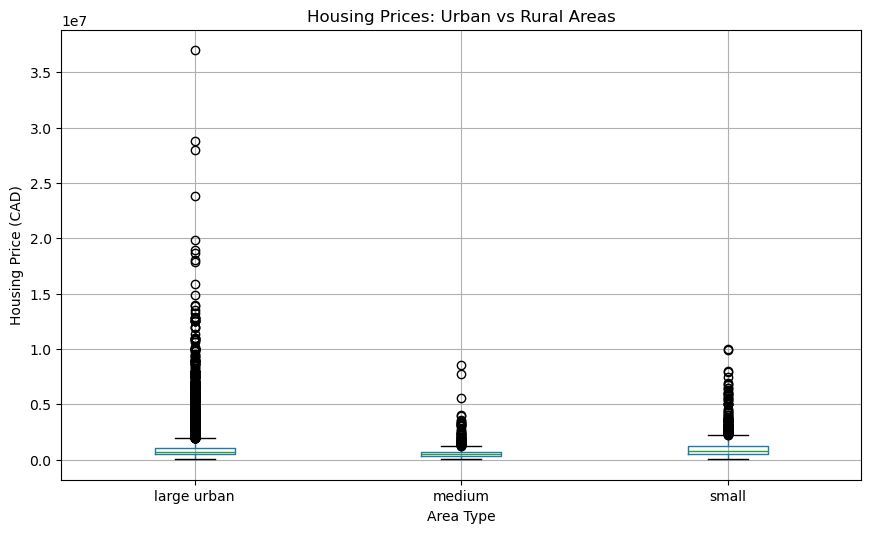

In [7]:
# Analyze the relationship between number of bedrooms, bathrooms, and housing prices
# Group by city and area type to get the average price per bedroom in each city
city_bedroom_summary = data.groupby(['city', 'area_type']).agg(
    avg_price_per_bedroom=('price', lambda x: x.mean() / data['beds'].mean()),
    avg_bedrooms=('beds', 'mean'),
    avg_bathrooms=('baths', 'mean'),
    avg_price=('price', 'mean')
).reset_index()

# Separate the urban and rural areas for comparison
urban_areas = city_bedroom_summary[city_bedroom_summary['area_type'] == 'large urban']
rural_areas = city_bedroom_summary[city_bedroom_summary['area_type'] != 'large urban']

# Plot comparison between urban and rural areas
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot to compare prices between urban and rural areas
data.boxplot(column='price', by='area_type', ax=ax)
ax.set_title('Housing Prices: Urban vs Rural Areas')
ax.set_xlabel('Area Type')
ax.set_ylabel('Housing Price (CAD)')
plt.suptitle('')

plt.show()


In [8]:
#Relationship between number of bedrooms and home prices in urban vs rural areas
urban_data = data[data['area_type'] == 'large urban']
rural_data = data[data['area_type'] != 'large urban']

# Correlation between bedrooms and price in urban and rural areas
urban_corr = urban_data[['beds', 'price']].corr().iloc[0, 1]
rural_corr = rural_data[['beds', 'price']].corr().iloc[0, 1]

# 2. Correlation between population density and housing features (bedrooms, bathrooms)
pop_density_corr_beds = data[['pop_density_sq_km', 'beds']].corr().iloc[0, 1]
pop_density_corr_baths = data[['pop_density_sq_km', 'baths']].corr().iloc[0, 1]

# 3. Top cities with the highest average price per bedroom
top_cities_by_price_per_bedroom = city_bedroom_summary.nlargest(5, 'avg_price_per_bedroom')

# Display the key correlations and top cities

analysis_results = {
    'Urban correlation (Beds vs Price)': urban_corr,
    'Rural correlation (Beds vs Price)': rural_corr,
    'Population Density correlation with Beds': pop_density_corr_beds,
    'Population Density correlation with Baths': pop_density_corr_baths
}
analysis_results
# Apply formatting to each relevant column for the dataframe before printing
top_cities_by_price_per_bedroom_formatted = top_cities_by_price_per_bedroom.copy()

# Format the columns to two decimal places with commas
top_cities_by_price_per_bedroom_formatted['avg_price_per_bedroom'] = top_cities_by_price_per_bedroom_formatted['avg_price_per_bedroom'].map('{:,.2f}'.format)
top_cities_by_price_per_bedroom_formatted['avg_bedrooms'] = top_cities_by_price_per_bedroom_formatted['avg_bedrooms'].map('{:.2f}'.format)
top_cities_by_price_per_bedroom_formatted['avg_bathrooms'] = top_cities_by_price_per_bedroom_formatted['avg_bathrooms'].map('{:.2f}'.format)
top_cities_by_price_per_bedroom_formatted['avg_price'] = top_cities_by_price_per_bedroom_formatted['avg_price'].map('{:,.2f}'.format)

# Print the formatted dataframe
top_cities_by_price_per_bedroom_formatted[['city', 'area_type', 'avg_price_per_bedroom', 'avg_bedrooms', 'avg_bathrooms', 'avg_price']]


,city,area_type,avg_price_per_bedroom,avg_bedrooms,avg_bathrooms,avg_price
39,White Rock,large urban,"650,070.47",3.72,3.35,"2,219,142.15"
37,Vancouver,large urban,"547,200.90",2.81,2.50,"1,867,976.82"
4,Caledon,small,"405,021.31",4.02,3.29,"1,382,619.11"
0,Abbotsford,large urban,"388,723.83",3.85,2.87,"1,326,984.47"
35,Toronto,large urban,"364,297.03",2.73,2.13,"1,243,598.83"
